In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
X = pd.read_csv("data-without-label.csv")
X.drop(columns=["Unnamed: 0"], inplace=True)
y = pd.read_csv("label.csv")
y.drop(columns=["Unnamed: 0"], inplace=True)

In [3]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,9.300,Low Fat,0.016047,Dairy,Medium,Tier 1,Supermarket Type1,3735.1380,15.0
1,5.920,Regular,0.019278,Soft Drinks,Medium,Tier 3,Supermarket Type2,443.4228,1.0
2,17.500,Low Fat,0.016760,Meat,Medium,Tier 1,Supermarket Type1,2097.2700,15.0
3,19.200,Regular,0.000000,Fruits and Vegetables,Medium,Tier 3,Grocery Store,732.3800,7.0
4,8.930,Low Fat,0.000000,Household,High,Tier 3,Supermarket Type1,994.7052,19.0
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,High,Tier 3,Supermarket Type1,2778.3834,22.0
8519,8.380,Regular,0.046982,Baking Goods,Medium,Tier 2,Supermarket Type1,549.2850,36.0
8520,10.600,Low Fat,0.035186,Health and Hygiene,Small,Tier 2,Supermarket Type1,1193.1136,29.0
8521,7.210,Regular,0.145221,Snack Foods,Medium,Tier 3,Supermarket Type2,1845.5976,46.0


In [4]:
y

,Item_MRP
0,249.8092
1,48.2692
2,141.6180
3,182.0950
4,53.8614
...,...
8518,214.5218
8519,108.1570
8520,85.1224
8521,103.1332


In [5]:
import pickle
with open('preprocessor.pkl', 'rb') as f:
    preprocessor = pickle.load(f)
    
preprocessor = preprocessor["preprocessor"]

In [6]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_Outlet_Sales', 'Item_Category'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low '...
                                                                              'Hygiene',
                                                                              'Soft '
                                                                              'Drinks',
                                                                              'Meat',
                                                                              'Breads',
                                                                              'Hard '
                                                                              'Drinks',
                                                                              'Others',
                                                                              'Starchy '
                                                                              'Foods',
                                                                              'Breakfast',
                                                                              'Seafood'],
                                                                             ['Medium',
                                                                              'Small',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '3',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '1'],
                                                                             ['Supermarket '
                                                                              'Type1',
                                                                              'Grocery '
                                                                              'Store',
                                                                              'Supermarket '
                                                                              'Type3',
                                                                              'Supermarket '
                                                                              'Type2']]))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))])

In [7]:
input_feature_train_arr=preprocessor.fit_transform( X)
input_feature_test_arr=preprocessor.transform(X)
            
train_array = np.c_[input_feature_train_arr, np.array(y)]
test_array = np.c_[input_feature_test_arr,np.array(y)]

In [8]:
#train test split
X_train, y_train, X_test, y_test = (
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

In [12]:
# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# 2. Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

# 3. Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
r2_forest = r2_score(y_test, y_pred_forest)

import xgboost as xgb
forest_xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
forest_xgb_model.fit(X_train, y_train)
y_pred_xgb = forest_xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_forest))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display RMSE and R² results for comparison
results = {
    'Linear Regression': {'RMSE': rmse_linear, 'R²': r2_linear},
    'Decision Tree': {'RMSE': rmse_tree, 'R²': r2_tree},
    'Random Forest': {'RMSE': rmse_forest, 'R²': r2_forest},
    'XGBRFRegressor' : {'RMSE': rmse_xgb, 'R²': r2_xgb}
}

results

{'Linear Regression': {'RMSE': 50.78931416808959, 'R²': 0.33477700189438087},
 'Decision Tree': {'RMSE': 0.0, 'R²': 1.0},
 'Random Forest': {'RMSE': 15.862718356712671, 'R²': 0.935109998344468},
 'XGBRFRegressor': {'RMSE': 15.862718356712671, 'R²': 0.875101265103406}}

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


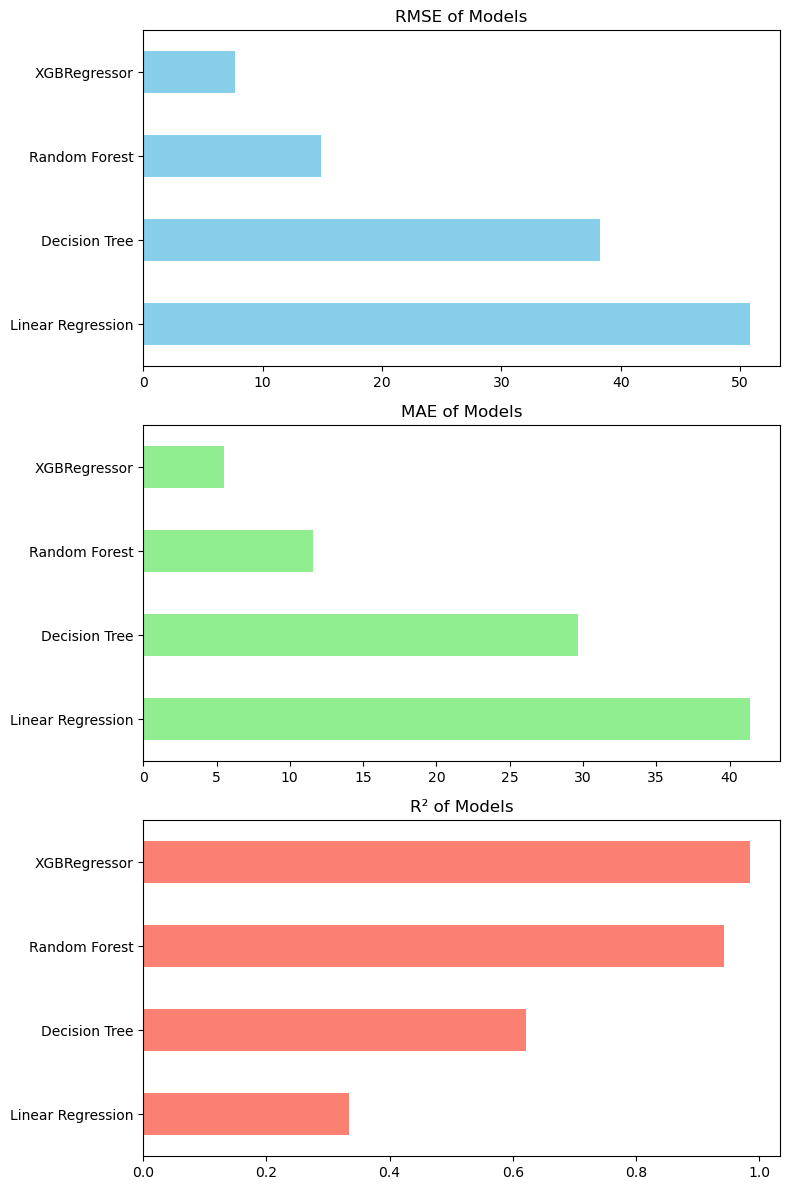

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define parameter grids
linear_params = {'fit_intercept': [True, False]}
tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}
forest_params = {'n_estimators': [50, 100, 200], 'max_features': ['sqrt', 'log2']}  # Adjusted from 'auto' to 'sqrt' or None
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# Setup GridSearchCV
grid_linear = GridSearchCV(linear_model, linear_params, cv=5, scoring='neg_mean_squared_error')
grid_tree = GridSearchCV(tree_model, tree_params, cv=5, scoring='neg_mean_squared_error')
grid_forest = GridSearchCV(forest_model, forest_params, cv=5, scoring='neg_mean_squared_error')
grid_xgb = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit models
grid_linear.fit(X_train, y_train)
grid_tree.fit(X_train, y_train)
grid_forest.fit(X_train, y_train)
grid_xgb.fit(X_train, y_train)

# Predictions and Metrics
metrics = {}
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBRegressor']
predictions = [
    grid_linear.best_estimator_.predict(X_test),
    grid_tree.best_estimator_.predict(X_test),
    grid_forest.best_estimator_.predict(X_test),
    grid_xgb.best_estimator_.predict(X_test)
]

for model, pred in zip(models, predictions):
    metrics[model] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, pred)),
        'MAE': mean_absolute_error(y_test, pred),
        'R²': r2_score(y_test, pred)
    }

# Convert metrics dictionary to DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics).T  # Transpose to suit plotting

# Plotting results
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
metrics_df['RMSE'].plot(kind='barh', ax=ax[0], color='skyblue')
ax[0].set_title('RMSE of Models')
metrics_df['MAE'].plot(kind='barh', ax=ax[1], color='lightgreen')
ax[1].set_title('MAE of Models')
metrics_df['R²'].plot(kind='barh', ax=ax[2], color='salmon')
ax[2].set_title('R² of Models')

plt.tight_layout()
plt.show()


In [15]:
metrics_df

,RMSE,MAE,R²
Linear Regression,50.789314,41.371672,0.334777
Decision Tree,38.281454,29.669394,0.622080
Random Forest,14.901437,11.558773,0.942736
XGBRegressor,7.707788,5.527955,0.984679
